In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_pickle('data/df_4_VARMAX.pkl')

In [108]:
# Left only rows where index > 1990-01-01   
df = df[df.index > '1990-01-01']
df = df[df.index < '2020-01-01']
df.head(3)

,Number of births,Number of deaths,Number of divorces,Number of marriages,Percentage of deaths,NV.MNF.OTHR.ZS.UN,NY.ADJ.DMIN.CD,NY.ADJ.NNAT.CD,NY.TRF.NCTR.KN,PA.NUS.ATLS,PA.NUS.FCRF,SP.POP.0014.MA.IN,SP.POP.0014.TO
Year,,,,,,,,,,,,,
1991-01-01,33651.333333,16297.416667,6579.50,14354.25,8.341667,43.777803,2.081227e+09,-7.784764e+08,-3.066013e+10,1.1457,1.145726,2973939.0,5803049.0
1992-01-01,33259.083333,16377.916667,6771.25,13714.50,8.325000,42.848850,1.579632e+09,-8.201108e+09,-3.345334e+10,1.2087,1.208723,3009190.0,5871716.0
1993-01-01,32419.750000,17076.000000,6675.25,13276.25,8.341667,43.309387,9.317563e+08,-2.028566e+09,-3.255120e+10,1.2901,1.290088,3036969.0,5924949.0


In [109]:
df.tail(3)

,Number of births,Number of deaths,Number of divorces,Number of marriages,Percentage of deaths,NV.MNF.OTHR.ZS.UN,NY.ADJ.DMIN.CD,NY.ADJ.NNAT.CD,NY.TRF.NCTR.KN,PA.NUS.ATLS,PA.NUS.FCRF,SP.POP.0014.MA.IN,SP.POP.0014.TO
Year,,,,,,,,,,,,,
2017-01-01,31468.916667,23191.50,5188.00,12409.00,8.341667,46.679264,2.377410e+09,5.356137e+10,-2.355937e+10,1.297936,1.297936,3016815.0,5911133.0
2018-01-01,31218.083333,23806.25,5112.00,12571.50,8.341667,46.779265,1.652056e+09,5.392260e+10,-2.355937e+10,1.295794,1.295818,3044660.0,5962641.0
2019-01-01,31081.500000,23772.50,4744.75,12176.75,8.316667,44.916304,1.874844e+09,5.951557e+10,-2.355937e+10,1.326793,1.326793,3070498.0,6010245.0


In [110]:
# Use certain columns as predictors (exogenous inputs)
exog_columns = ['NV.MNF.OTHR.ZS.UN', 'NY.TRF.NCTR.KN', 'PA.NUS.ATLS']
exog = df[exog_columns]

# Convert the target series to DataFrame
endog = df[['Number of divorces', 'Number of marriages']]

# Fill NA with mean
exog = exog.fillna(exog.mean())
endog = endog.fillna(endog.mean())

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

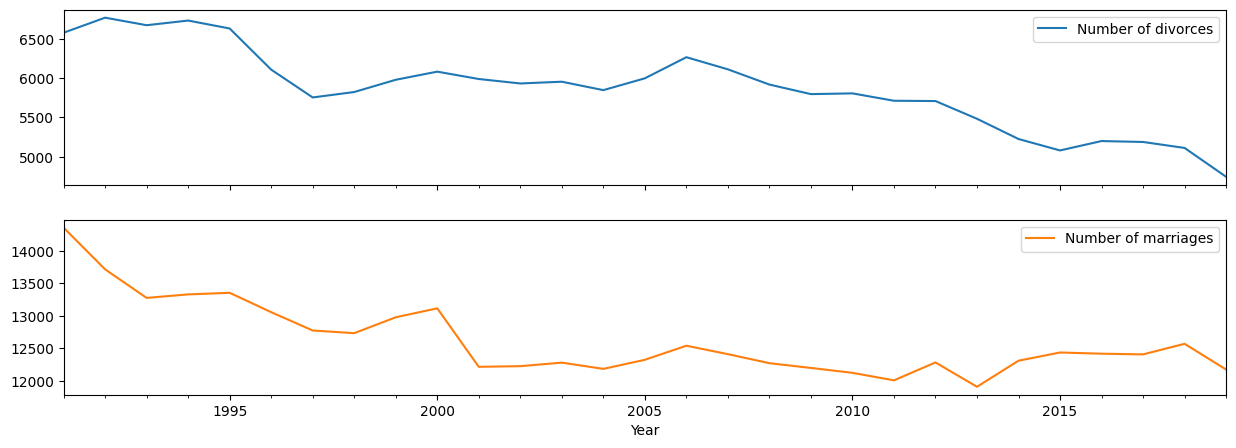

In [111]:
endog.plot(subplots=True, figsize=(15, 5))

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>], dtype=object)

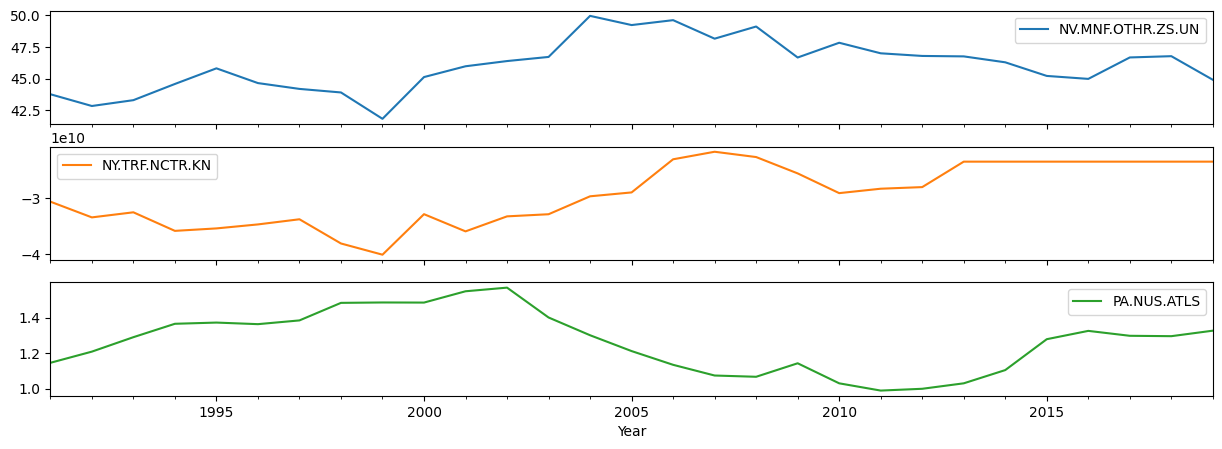

In [112]:
exog.plot(subplots=True, figsize=(15, 5))

In [113]:
# Split into train and test datasets 
test_years = 3
train_endog = endog[:-test_years]
train_exog = exog[:-test_years]
test_endog = endog[-test_years:]
test_exog = exog[-test_years:]

In [114]:
# Initialize the scalers
exog_scaler = StandardScaler()
endog_scaler = StandardScaler()


# Fit and transform on training data
train_exog = pd.DataFrame(exog_scaler.fit_transform(train_exog.values), columns=train_exog.columns, index=train_exog.index)
train_endog = pd.DataFrame(endog_scaler.fit_transform(train_endog.values), columns=train_endog.columns, index=train_endog.index)

# Transform the test data
test_exog = pd.DataFrame(exog_scaler.transform(test_exog.values), columns=test_exog.columns, index=test_exog.index)
test_endog = pd.DataFrame(endog_scaler.transform(test_endog.values), columns=test_endog.columns, index=test_endog.index)

In [115]:
# Define the model
model = VARMAX(endog=train_endog, exog=train_exog, order=(1, 0))

# Fit the model
model_fit = model.fit(disp=False)

In [116]:
# Make predictions
predictions = model_fit.predict(start=len(train_endog), end=len(train_endog)+len(test_endog)-1, exog=test_exog)

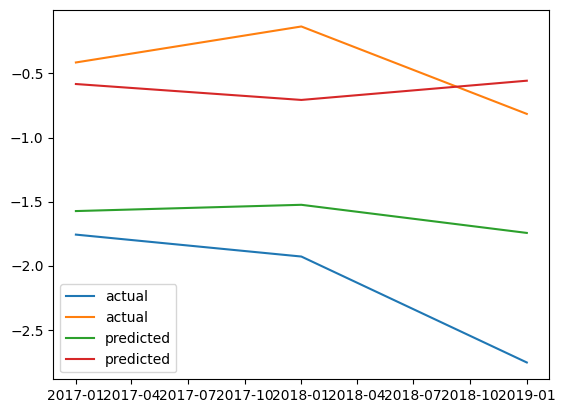

RMSE: 0.5066799384787483


In [117]:
# Plot actual vs predicted values
plt.plot(test_endog, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()

# Calculate RMSE
rmse = mean_squared_error(test_endog, predictions, squared=False)
print(f'RMSE: {rmse}')

---
## Not the best model, but I do this project not in pair unfortunately
# THANK YOU FOR THIS COURSE!!!